# KNN 

## Problem Statement :- Data for classifying patients based on two classes

## Biomechanical features of orthopedic patients

## Columns:-
    pelvic_incidence
    pelvic_tilt numeric
    lumbar_lordosis_angle
    sacral_slope
    pelvic_radius
    degree_spondylolisthesis
    class

## About Data :-
    The data have been organized in two different but related classification tasks.

    column_3C_weka.csv (file with three class labels)

    The first task consists in classifying patients as belonging to one out of three categories: Normal (100 patients), Disk Hernia (60 patients) or Spondylolisthesis (150 patients).
    
    column_2C_weka.csv (file with two class labels)

    For the second task, the categories Disk Hernia and Spondylolisthesis were merged into a single category labelled as 'abnormal'. Thus, the second task consists in classifying patients as belonging to one out of two categories: Normal (100 patients) or Abnormal (210 patients).

## Field Descriptions:

    Each patient is represented in the data set by six biomechanical attributes derived from the shape and orientation of the pelvis and lumbar spine (each one is a column):

    pelvic incidence
    pelvic tilt
    lumbar lordosis angle
    sacral slope
    pelvic radius
    grade of spondylolisthesis

## Step 1:- Imports

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
# read csv (comma separated value) into data
data = pd.read_csv('column_2C_weka.csv')
print(plt.style.available) # look at available plot styles
plt.style.use('_classic_test')


['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', '_classic_test']


## STEP 2:-EXPLORATORY DATA ANALYSIS (EDA)

In [3]:
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


- Features are pelvic_incidence, pelvic_tilt numeric, lumbar_lordosis_angle, sacral_slope, pelvic_radius and degree_spondylolisthesis
- Target variable  is class

#### ROWS AND COLUMNS

In [4]:
data.shape

(310, 7)

In [5]:
print('No of columns in the dataset:',data.columns.size)
print("Name of Columns:\n",data.columns.values)

No of columns in the dataset: 7
Name of Columns:
 ['pelvic_incidence' 'pelvic_tilt numeric' 'lumbar_lordosis_angle'
 'sacral_slope' 'pelvic_radius' 'degree_spondylolisthesis' 'class']


#### To check about Numerics/Categorical Columns

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
pelvic_incidence            310 non-null float64
pelvic_tilt numeric         310 non-null float64
lumbar_lordosis_angle       310 non-null float64
sacral_slope                310 non-null float64
pelvic_radius               310 non-null float64
degree_spondylolisthesis    310 non-null float64
class                       310 non-null object
dtypes: float64(6), object(1)
memory usage: 17.0+ KB


 - length: 310 (range index)
 - Features are float
 - Target variables are object that is like string

#### Summary of the Data

In [7]:
data.describe()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


#### Pairplot on the data

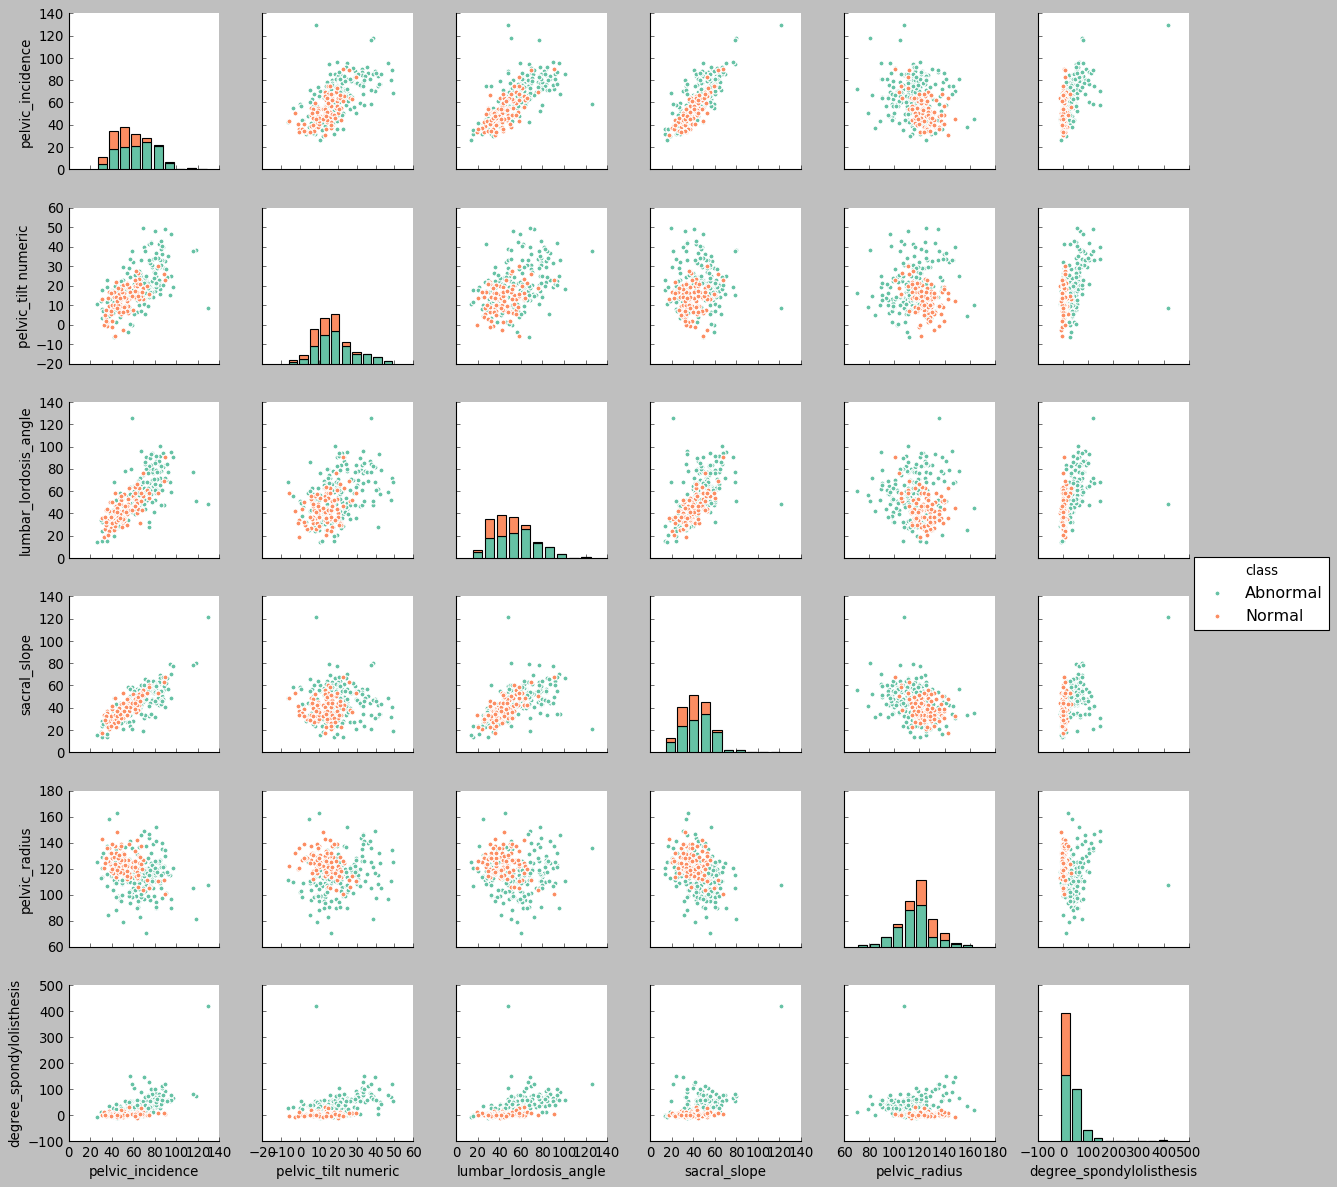

In [8]:
sns.pairplot(data,hue="class",palette="Set2")
plt.show()

##### pd.plotting.scatter_matrix:

    green: normal and red: abnormal
    c: color
    figsize: figure size
    diagonal: histogram of each features
    alpha: opacity
    s: size of marker
    marker: marker type

#### Scatter Matrix on the Data to find the relations among Features

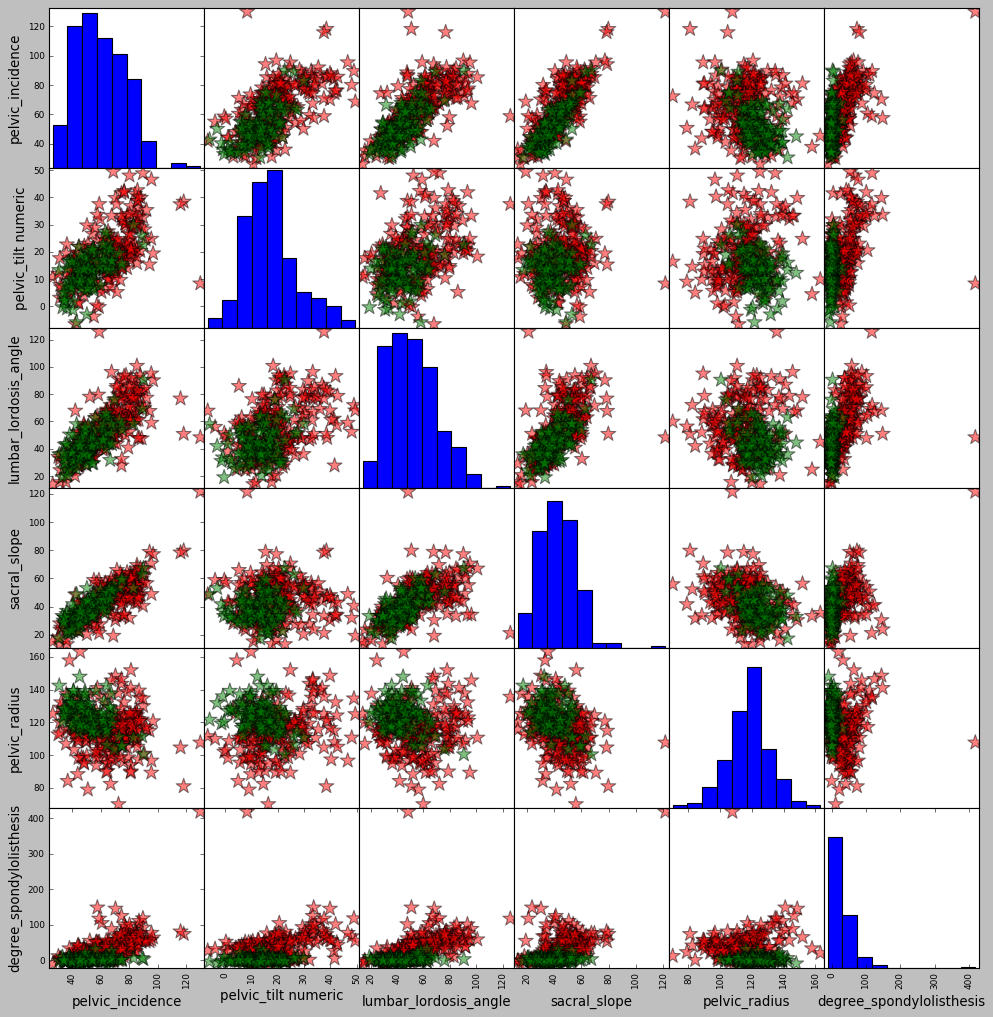

In [9]:
color_list = ['red' if i=='Abnormal' else 'green' for i in data.loc[:,'class']]
pd.plotting.scatter_matrix(data.loc[:, data.columns != 'class'],
                                       c=color_list,
                                       figsize= [15,15],
                                       diagonal='hist',
                                       alpha=0.5,
                                       s = 200,
                                       marker = '*',
                                       edgecolor= "black")
plt.show()

## Okay, scatter matrix there are relations between each feature but how many normal(green) and abnormal(red) classes are there.

#### Class Distributuon

In [10]:
data.loc[:,'class'].value_counts()

Abnormal    210
Normal      100
Name: class, dtype: int64

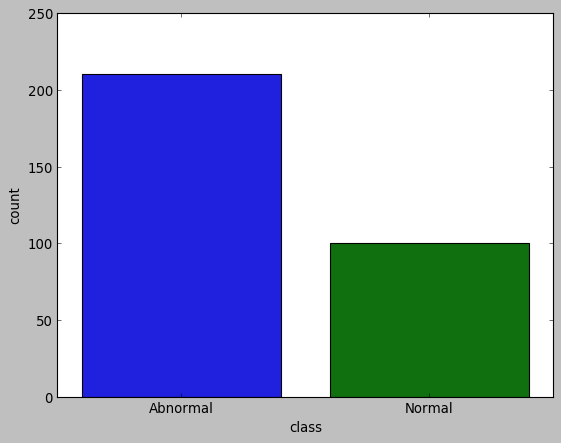

In [11]:
sns.countplot(x="class", data=data)


In [12]:
data.columns

Index(['pelvic_incidence', 'pelvic_tilt numeric', 'lumbar_lordosis_angle',
       'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis', 'class'],
      dtype='object')

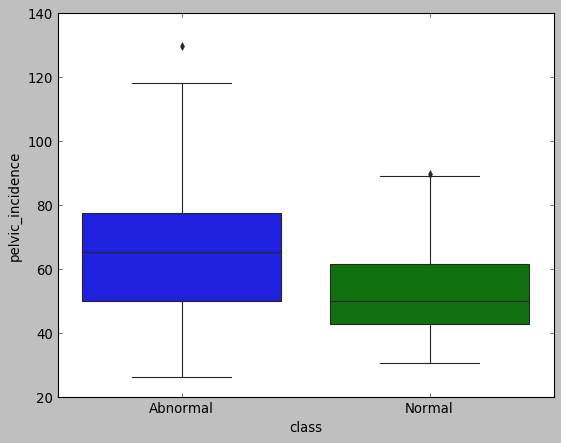

In [13]:
sns.boxplot(x='class',y='pelvic_incidence', data=data)

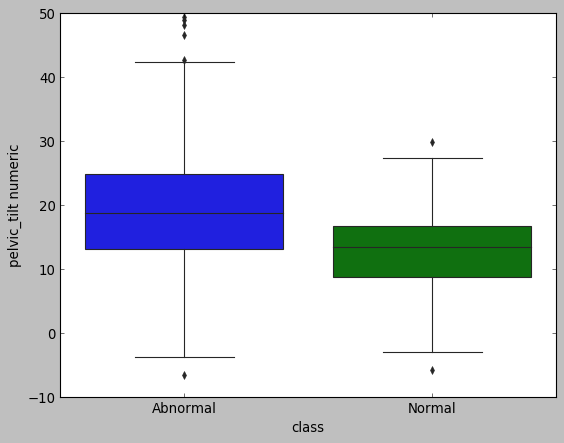

In [14]:
sns.boxplot(x='class',y='pelvic_tilt numeric', data=data)

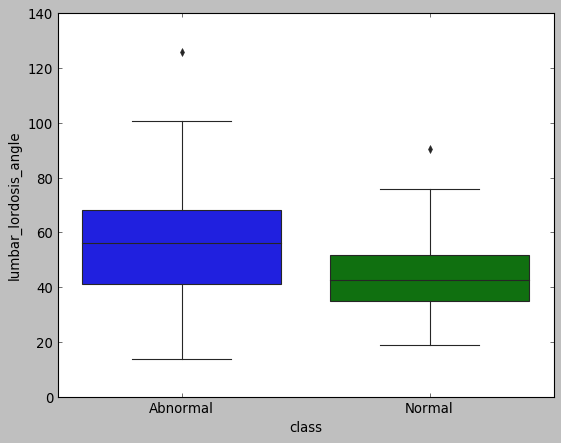

In [15]:
sns.boxplot(x='class',y='lumbar_lordosis_angle', data=data)

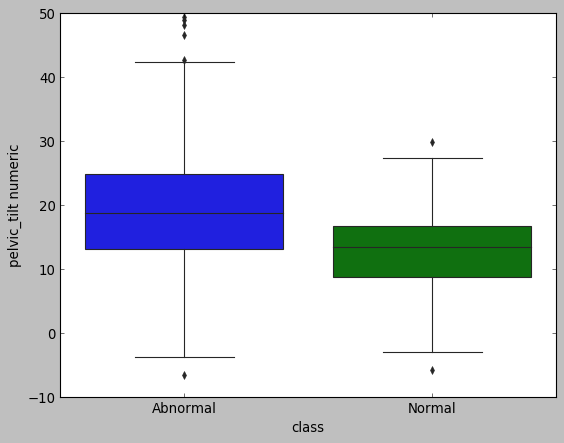

In [16]:
sns.boxplot(x='class',y='pelvic_tilt numeric', data=data)

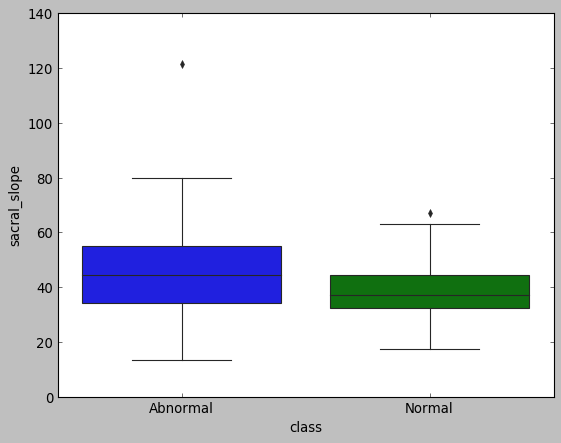

In [17]:
sns.boxplot(x='class',y='sacral_slope', data=data)

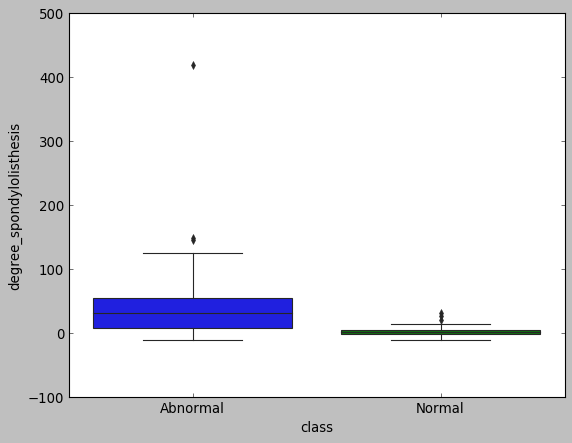

In [18]:
sns.boxplot(x='class',y='degree_spondylolisthesis', data=data)

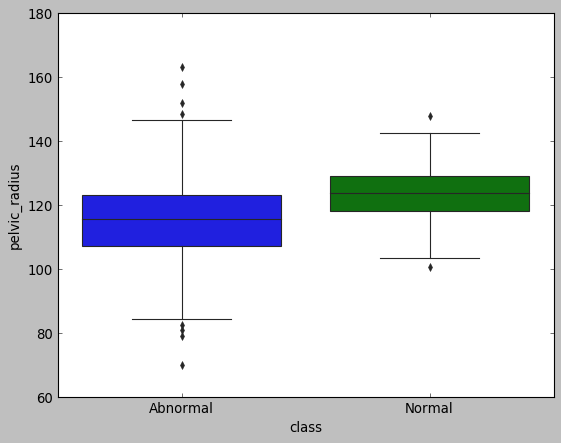

In [19]:
sns.boxplot(x='class',y='pelvic_radius', data=data)

#### KNN Invoking

In [20]:
# KNN - fit the model with k=3
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
x,y = data.loc[:,data.columns != 'class'], data.loc[:,'class']
knn.fit(x,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [21]:
#make predictions based on the model
prediction = knn.predict(x)
print('First five Predictions: {}'.format(prediction[0:5]))

First five Predictions: ['Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal']


## Measuring model performance:
    Accuracy which is fraction of correct predictions is commonly used metric.

In [22]:
# train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1)


In [23]:
print('X-train size: {}'.format(x_train.shape))
print('X-test size: {}'.format(x_test.shape))

X-train size: (217, 6)
X-test size: (93, 6)


In [24]:
#Build the model on the train set
knn = KNeighborsClassifier(n_neighbors = 3)
x,y = data.loc[:,data.columns != 'class'], data.loc[:,'class']
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [31]:
#predict probabilities - first 10 values
knn.predict_proba(x_test)[:10]

array([[1.        , 0.        ],
       [0.33333333, 0.66666667],
       [1.        , 0.        ],
       [0.66666667, 0.33333333],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.33333333, 0.66666667]])

In [32]:
prediction = knn.predict(x_test)
print('With KNN (K=3) accuracy is: ',knn.score(x_test,y_test)) # accuracy

With KNN (K=3) accuracy is:  0.8602150537634409


In [33]:
from sklearn.model_selection import cross_val_score


n_feats = x_train.shape[1]
n_feats

print('Feature  Accuracy')
for i in range(n_feats):
    X = x_train.iloc[:, i]
    scores = cross_val_score(knn, x_train, y_train)
    print('%d        %g' % (i, scores.mean()))


Feature  Accuracy
0        0.834158
1        0.834158
2        0.834158
3        0.834158
4        0.834158
5        0.834158


In [34]:
print('Feature  Accuracy')
for i in range(n_feats):
    X_head = np.atleast_2d(x_train.iloc[:, 0:i])
    X_tail = np.atleast_2d(x_train.iloc[:, i+1:])
    X = np.hstack((X_head, X_tail))
    scores = cross_val_score(knn, x_train, y_train)
    print('%d        %g' % (i, scores.mean()))

Feature  Accuracy
0        0.834158
1        0.834158
2        0.834158
3        0.834158
4        0.834158
5        0.834158


## Model complexity: Choose value of K that gives highest accuracy

In [35]:
# Model complexity
neig = np.arange(1, 25)
train_accuracy = []
test_accuracy = []
# Loop over different values of k
for i, k in enumerate(neig):
    # k from 1 to 25(exclude)
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit with knn
    knn.fit(x_train,y_train)
    #train accuracy
    train_accuracy.append(knn.score(x_train, y_train))
    # test accuracy
    test_accuracy.append(knn.score(x_test, y_test))

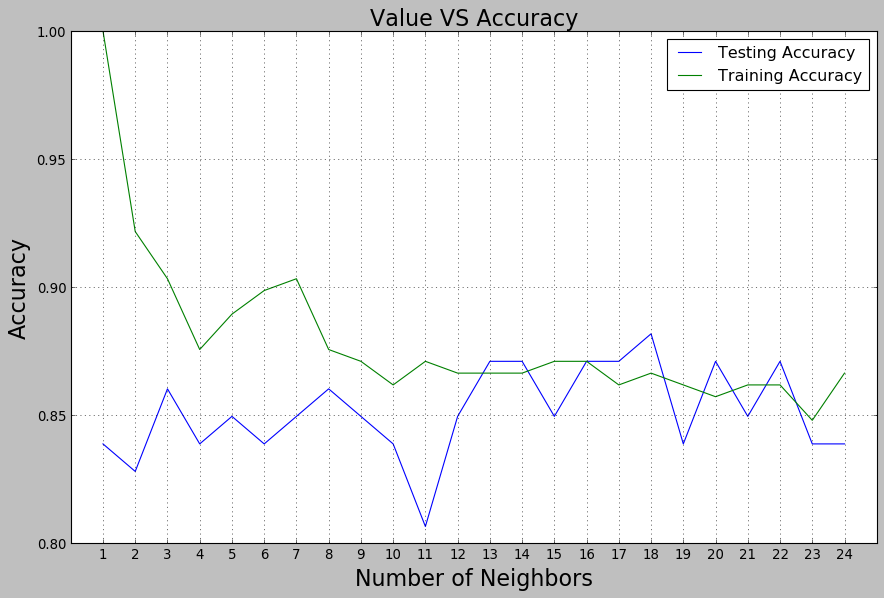

Best accuracy is 0.8817204301075269 with K = 18


In [36]:
# Plot
plt.figure(figsize=[13,8])
plt.plot(neig, test_accuracy, label = 'Testing Accuracy')
plt.plot(neig, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('Value VS Accuracy',fontsize=20)
plt.xlabel('Number of Neighbors',fontsize=20)
plt.ylabel('Accuracy',fontsize=20)
plt.xticks(neig)
plt.grid()
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

#### TUNING AND HYPERPARAMETERS

#### CASE 1 - # grid search cross validation with 1 hyperparameter - value of k

In [37]:
#Set the grid to search for values of k, cv=3
from sklearn.model_selection import GridSearchCV
grid = {'n_neighbors': np.arange(1,25)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, grid, cv=3,verbose=True) # GridSearchCV
knn_cv.fit(x,y)# Fit

# Print hyperparameter
print("Tuned hyperparameter k: {}".format(knn_cv.best_params_)) 
print("Best score: {}".format(knn_cv.best_score_))


Fitting 3 folds for each of 24 candidates, totalling 72 fits
Tuned hyperparameter k: {'n_neighbors': 3}
Best score: 0.7451612903225806


[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:    0.2s finished


#### CASE 2:-

In [38]:
#p=2 for eucledian distance
from sklearn.neighbors import KNeighborsClassifier
grid = {'n_neighbors': np.arange(1,25)}
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn_cv = GridSearchCV(knn, grid, cv=3, verbose=True) # GridSearchCV
knn_cv.fit(x_train, y_train)

print('The accuracy of the knn classifier is {:.2f} out of 1 on training data'.format(knn_cv.score(x_train, y_train)))
print('The accuracy of the knn classifier is {:.2f} out of 1 on test data'.format(knn_cv.score(x_test, y_test)))
print("Tuned hyperparameter k: {}".format(knn_cv.best_params_)) 
print("Best score: {}".format(knn_cv.best_score_))


Fitting 3 folds for each of 24 candidates, totalling 72 fits
The accuracy of the knn classifier is 0.87 out of 1 on training data
The accuracy of the knn classifier is 0.85 out of 1 on test data
Tuned hyperparameter k: {'n_neighbors': 12}
Best score: 0.8571428571428571


[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:    0.1s finished


#### CASE 3:-

In [39]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=12, p=6, metric='minkowski')
knn.fit(x_train, y_train)

print('The accuracy of the knn classifier is {:.2f} out of 1 on training data'.format(knn.score(x_train, y_train)))
print('The accuracy of the knn classifier is {:.2f} out of 1 on test data'.format(knn.score(x_test, y_test)))


The accuracy of the knn classifier is 0.87 out of 1 on training data
The accuracy of the knn classifier is 0.83 out of 1 on test data


#### CASE 4:-

In [40]:
#Change the value of p
from sklearn.neighbors import KNeighborsClassifier
train_score_knn=[]
test_score_knn=[]
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=12, p=i, metric='minkowski')
    knn.fit(x_train, y_train)
    train_score_knn.append(knn.score(x_train, y_train))
    test_score_knn.append(knn.score(x_test, y_test))
    print('For p value=',i)
    print('The accuracy of the knn classifier is {:.2f} out of 1 on training data'.format(knn.score(x_train, y_train)))
    print('The accuracy of the knn classifier is {:.2f} out of 1 on test data'.format(knn.score(x_test, y_test)))
    print()


For p value= 1
The accuracy of the knn classifier is 0.85 out of 1 on training data
The accuracy of the knn classifier is 0.86 out of 1 on test data

For p value= 2
The accuracy of the knn classifier is 0.87 out of 1 on training data
The accuracy of the knn classifier is 0.85 out of 1 on test data

For p value= 3
The accuracy of the knn classifier is 0.86 out of 1 on training data
The accuracy of the knn classifier is 0.85 out of 1 on test data

For p value= 4
The accuracy of the knn classifier is 0.88 out of 1 on training data
The accuracy of the knn classifier is 0.84 out of 1 on test data

For p value= 5
The accuracy of the knn classifier is 0.87 out of 1 on training data
The accuracy of the knn classifier is 0.83 out of 1 on test data

For p value= 6
The accuracy of the knn classifier is 0.87 out of 1 on training data
The accuracy of the knn classifier is 0.83 out of 1 on test data

For p value= 7
The accuracy of the knn classifier is 0.87 out of 1 on training data
The accuracy of 

In [35]:
#Change the value of p
from sklearn.neighbors import KNeighborsClassifier
train_score_knn=[]
test_score_knn=[]
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=12, p=i, metric='minkowski',weights='distance')
    knn.fit(x_train, y_train)
    train_score_knn.append(knn.score(x_train, y_train))
    test_score_knn.append(knn.score(x_test, y_test))
    print('For p value=',i)
    print('The accuracy of the knn classifier is {:.2f} out of 1 on training data'.format(knn.score(x_train, y_train)))
    print('The accuracy of the knn classifier is {:.2f} out of 1 on test data'.format(knn.score(x_test, y_test)))
    print()

For p value= 1
The accuracy of the knn classifier is 1.00 out of 1 on training data
The accuracy of the knn classifier is 0.85 out of 1 on test data

For p value= 2
The accuracy of the knn classifier is 1.00 out of 1 on training data
The accuracy of the knn classifier is 0.87 out of 1 on test data

For p value= 3
The accuracy of the knn classifier is 1.00 out of 1 on training data
The accuracy of the knn classifier is 0.86 out of 1 on test data

For p value= 4
The accuracy of the knn classifier is 1.00 out of 1 on training data
The accuracy of the knn classifier is 0.86 out of 1 on test data

For p value= 5
The accuracy of the knn classifier is 1.00 out of 1 on training data
The accuracy of the knn classifier is 0.85 out of 1 on test data

For p value= 6
The accuracy of the knn classifier is 1.00 out of 1 on training data
The accuracy of the knn classifier is 0.85 out of 1 on test data

For p value= 7
The accuracy of the knn classifier is 1.00 out of 1 on training data
The accuracy of 